In [213]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.special import boxcox1p,inv_boxcox1p,boxcox
from scipy.stats import norm,skew
from sklearn.preprocessing import MultiLabelBinarizer,LabelEncoder
from sklearn.model_selection import cross_val_score
import ast

In [214]:
train_data=pd.read_csv("E:\\Python\\Zonline\\tmdb-box-office-prediction\\train.csv")
test_data=pd.read_csv("E:\\Python\\Zonline\\tmdb-box-office-prediction\\test.csv")

In [215]:
pd.set_option('display.max_columns', 100000)
pd.set_option('display.max_rows', 100000)


In [216]:
train_data.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000


In [217]:
test_data.head(3)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."


In [218]:
train_data.shape,test_data.shape

((3000, 23), (4398, 22))

In [219]:
#train_data.info()

In [220]:
#test_data.isnull().sum()

In [221]:
for i in train_data.columns:
    if i not in test_data.columns:
        print(i)

revenue


### Step 1:Target Variable modification
As we can see in fig 1, train_data['revenue'] is not normally distributed. So, to distribute it we can try 'log transformation'
or 'box-cox transformation'. Applied box-cox as I get better result on comparing to log.
So after box-cox the normal distribution is shown is fig 2.

In [222]:
#revenue=train_data['revenue']
revenue=pd.DataFrame(train_data['revenue'],columns=['revenue'])

In [223]:
revenue_log=boxcox1p(revenue,0.2)

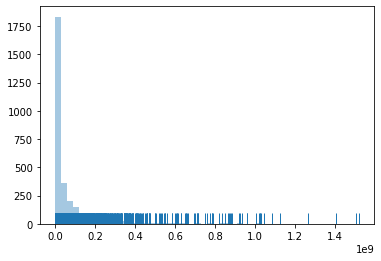

In [224]:
sns.distplot(revenue, kde=False, rug=True)

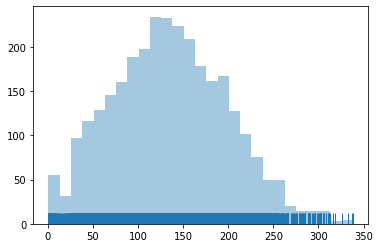

In [225]:
sns.distplot(revenue_log, kde=False, rug=True)

### Step2: Train and Test Concatination

In [226]:
train_data.drop('revenue',axis=1,inplace=True)

In [227]:
all_data=pd.concat([train_data,test_data],ignore_index=True).drop('id',axis=1)

In [228]:
all_data.shape,revenue_log.shape

((7398, 21), (3000, 1))

In [229]:
all_data.head(1)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."


### Step3:change from JSon Like formatting
Some features are in a JSON-like format and will need to be converted to dictionaries or lists before being used. We will do it with ast.literal_eval().The 'ast.literal_eval' raises an exception if the input isn't a valid Python datatype, so the code won't be executed if it's not.Use 'ast.literal_eval' whenever you need 'eval'. You shouldn't usually evaluate literal Python statements

In [231]:
"""features_to_fix=["belongs_to_collection","production_companies", "production_countries","Keywords"]
for feature in features_to_fix:
    all_data.loc[all_data[feature].notnull(),feature]=\
    all_data.loc[all_data[feature].notnull(),feature].apply(lambda x : ast.literal_eval(x))\
    .apply(lambda x : [y["name"] for y in x])"""

#trying to convert it into dictionary
dict_columns = ['belongs_to_collection', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
all_data = text_to_dict(all_data)



In [230]:
all_data.loc[all_data["genres"].notnull(),"genres"]=all_data.loc[all_data["genres"].notnull(),"genres"].\
                              apply(lambda x : ast.literal_eval(x)).apply(lambda x : [y["name"] for y in x])

In [232]:
all_data.head(2)

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,[Comedy],NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de..."
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[Comedy, Drama, Family, Romance]",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de..."


In [233]:
#all_data.loc[all_data["cast"].notnull(),"cast"]=all_data.loc[all_data["cast"].notnull(),"cast"].apply(lambda x : ast.literal_eval(x))
#all_data.loc[all_data["crew"].notnull(),"crew"]=all_data.loc[all_data["crew"].notnull(),"crew"].apply(lambda x : ast.literal_eval(x))

In [234]:
#all_data.head(2)

In [235]:
"""all_data["cast_len"] = all_data.loc[all_data["cast"].notnull(),"cast"].apply(lambda x : len(x))
all_data["crew_len"] = all_data.loc[all_data["crew"].notnull(),"crew"].apply(lambda x : len(x))

all_data["production_companies_len"]=all_data.loc[all_data["production_companies"].notnull(),"production_companies"].apply(lambda x : len(x))

all_data["production_countries_len"]=all_data.loc[all_data["production_countries"].notnull(),"production_countries"].apply(lambda x : len(x))

all_data["Keywords_len"]=all_data.loc[all_data["Keywords"].notnull(),"Keywords"].apply(lambda x : len(x))
all_data["genres_len"]=all_data.loc[all_data["genres"].notnull(),"genres"].apply(lambda x : len(x))


all_data['original_title_letter_count'] = all_data['original_title'].str.len() 
all_data['original_title_word_count'] = all_data['original_title'].str.split().str.len() 
all_data['title_word_count'] = all_data['title'].str.split().str.len()
all_data['overview_word_count'] = all_data['overview'].str.split().str.len()
all_data['tagline_word_count'] = all_data['tagline'].str.split().str.len()"""

'all_data["cast_len"] = all_data.loc[all_data["cast"].notnull(),"cast"].apply(lambda x : len(x))\nall_data["crew_len"] = all_data.loc[all_data["crew"].notnull(),"crew"].apply(lambda x : len(x))\n\nall_data["production_companies_len"]=all_data.loc[all_data["production_companies"].notnull(),"production_companies"].apply(lambda x : len(x))\n\nall_data["production_countries_len"]=all_data.loc[all_data["production_countries"].notnull(),"production_countries"].apply(lambda x : len(x))\n\nall_data["Keywords_len"]=all_data.loc[all_data["Keywords"].notnull(),"Keywords"].apply(lambda x : len(x))\nall_data["genres_len"]=all_data.loc[all_data["genres"].notnull(),"genres"].apply(lambda x : len(x))\n\n\nall_data[\'original_title_letter_count\'] = all_data[\'original_title\'].str.len() \nall_data[\'original_title_word_count\'] = all_data[\'original_title\'].str.split().str.len() \nall_data[\'title_word_count\'] = all_data[\'title\'].str.split().str.len()\nall_data[\'overview_word_count\'] = all_data[

In [236]:
"""imdb=list(all_data['imdb_id'])
imdb1=[]
for i in imdb:
    imdb1.append(i[2:])
imdb1"""

"imdb=list(all_data['imdb_id'])\nimdb1=[]\nfor i in imdb:\n    imdb1.append(i[2:])\nimdb1"

In [237]:
#all_data.head(2)

In [238]:
all_data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    5917
1    1481
Name: belongs_to_collection, dtype: int64

In [239]:
all_data['collection_name'] = all_data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
all_data['has_collection'] = all_data['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

#all_data['genres_name'] = all_data['genres'].apply(lambda x: x[0]['name'] if x != {} else 0)
#all_dataa['genres'].apply(lambda x: len(x) if x != {} else 0)

all_data['production_countries_name'] = all_data['production_countries'].apply(lambda x: x[0]['name'] if x != {} else 0)
all_data['has_productions'] = all_data['production_countries'].apply(lambda x: len(x) if x != {} else 0)

all_data['production_companies_name'] = all_data['production_companies'].apply(lambda x: x[0]['name'] if x != {} else 0)
all_data['has_production_companies'] = all_data['production_companies'].apply(lambda x: len(x) if x != {} else 0)

all_data['Keywords_name'] = all_data['Keywords'].apply(lambda x: x[0]['name'] if x != {} else 0)
all_data['has_keywords'] = all_data['Keywords'].apply(lambda x: len(x) if x != {} else 0)

all_data = all_data.drop(['belongs_to_collection','production_countries','production_companies','Keywords'], axis=1)

all_data["genres_len"]=all_data.loc[all_data["genres"].notnull(),"genres"].apply(lambda x : len(x))


all_data.loc[all_data["homepage"].notnull(),"homepage"]=1
all_data["homepage"]=all_data["homepage"].fillna(0)  # Note that we only need to know if the film has a webpage or not!
"""
all_data["in_collection"]=1
all_data[all_data["belongs_to_collection"].isnull(),"in_collection"]==0
"""
all_data["has_tagline"]=1
all_data.loc[all_data["tagline"].isnull(),"has_tagline"]==0

all_data["title_different"]=1
all_data.loc[all_data["title"]==all_data["original_title"],"title_different"]==0

all_data["isReleased"]=1
all_data.loc[all_data["status"]!="Released","isReleased"]==0

609     False
1007    False
1216    False
1618    False
3102    False
3264    False
3828    False
3847    False
4056    False
4260    False
4448    False
4477    False
5585    False
Name: isReleased, dtype: bool

In [240]:
all_data['collection_name'].value_counts()[1:10]

James Bond Collection                     26
Friday the 13th Collection                12
Pokémon Collection                         9
Star Wars Collection                       8
The Fast and the Furious Collection        8
Halloween Collection                       8
Harry Potter Collection                    8
The Pink Panther (Original) Collection     8
A Nightmare on Elm Street Collection       8
Name: collection_name, dtype: int64

#### new feature from "release_date" column

In [242]:
release_date=pd.to_datetime(all_data["release_date"])
all_data["release_year"]=release_date.dt.year
all_data["release_month"]=release_date.dt.month
all_data["release_day"]=release_date.dt.day
all_data["release_wd"]=release_date.dt.dayofweek
all_data["release_quarter"]=release_date.dt.quarter

#### features to simplify "cast" and "crew"

In [243]:
all_data.loc[all_data["cast"].notnull(),"cast"]=all_data.loc[all_data["cast"].notnull(),"cast"]\
.apply(lambda x : [y["name"] for y in x if y["order"]<6]) 


In [244]:
all_data["Director"]=[[] for i in range(all_data.shape[0])]
all_data["Producer"]=[[] for i in range(all_data.shape[0])]
all_data["Executive Producer"]=[[] for i in range(all_data.shape[0])]

all_data["Director"]=all_data.loc[all_data["crew"].notnull(),"crew"]\
.apply(lambda x : [y["name"] for y in x if y["job"]=="Director"])

all_data["Producer"]=all_data.loc[all_data["crew"].notnull(),"crew"]\
.apply(lambda x : [y["name"] for y in x if y["job"]=="Producer"])

all_data["Executive Producer"]=all_data.loc[all_data["crew"].notnull(),"crew"]\
.apply(lambda x : [y["name"] for y in x if y["job"]=="Executive Producer"])

#### dropping all useless column

In [245]:
all_data=all_data.drop(["imdb_id","original_title","overview","poster_path","tagline","status","title",\
           "spoken_languages","release_date","crew"],axis=1)

#### finding missing values percentages

In [247]:
mis_val=((all_data.isnull().sum()/all_data.shape[0])*100).sort_values(ascending=False)
mis_val=mis_val.drop(mis_val[mis_val==0].index)
print(mis_val)
#all_data.isnull().sum()

genres             0.310895
genres_len         0.310895
runtime            0.081103
release_quarter    0.013517
release_wd         0.013517
release_day        0.013517
release_month      0.013517
release_year       0.013517
dtype: float64


#### columns contains list and having missing values will be replaced with empty lists

In [248]:
all_data["genres"] = all_data["genres"].apply(lambda d: d if isinstance(d, list) else [])
all_data["cast"] = all_data["cast"].apply(lambda d: d if isinstance(d, list) else [])
all_data["Director"] = all_data["Director"].apply(lambda d: d if isinstance(d, list) else [])
all_data["Producer"] = all_data["Producer"].apply(lambda d: d if isinstance(d, list) else [])
all_data["Executive Producer"] = all_data["Executive Producer"].apply(lambda d: d if isinstance(d, list) else [])


#### missing values will be replaced with 0


In [249]:
missing_value=['genres_len','runtime','release_year','release_month','release_day','release_quarter','release_wd']
for fill in missing_value:
    all_data[fill]=all_data[fill].fillna(0)

#### creating new features by the help of budget and popularity 

In [250]:
all_data['budget_popularity_ratio'] = all_data['budget']/all_data['popularity']
all_data['releaseYear_popularity_ratio'] = all_data['release_year']/all_data['popularity']
all_data['releaseYear_popularity_ratio2'] = all_data['popularity']/all_data['release_year']

#### finding the columns which have skewness greater then 2.5

In [251]:
numeric=[feat for feat in all_data.columns if all_data[feat].dtype!="object"]

skewness=all_data[numeric].apply(lambda x : skew(x)).sort_values(ascending=False)
skew=skewness[skewness>2.5]
print(skew)

budget_popularity_ratio         85.779254
releaseYear_popularity_ratio    60.793692
popularity                      19.960329
has_keywords                     3.123832
has_productions                  2.990402
budget                           2.891855
dtype: float64


E:\Anaconda\lib\site-packages\scipy\stats\stats.py:984: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - np.expand_dims(np.mean(a, axis), axis)


#### modifying the column data with the help of skewness

In [252]:
high_skew=skew[skew>10].index
medium_skew=skew[skew<=10].index

for feat in high_skew:
    all_data[feat]=np.log1p(all_data[feat])

for feat in medium_skew:
    all_data[feat]=all_data[feat]=boxcox1p(all_data[feat],0.15)

In [253]:
skew=all_data[skew.index].skew()
print(skew)


budget_popularity_ratio        -0.881118
releaseYear_popularity_ratio    2.603587
popularity                     -0.437615
has_keywords                   -0.309683
has_productions                 1.332405
budget                         -0.476944
dtype: float64


In [254]:
all_data.head(10)

,budget,genres,homepage,original_language,popularity,runtime,cast,collection_name,has_collection,production_countries_name,has_productions,production_companies_name,has_production_companies,Keywords_name,has_keywords,genres_len,has_tagline,title_different,isReleased,release_year,release_month,release_day,release_wd,release_quarter,Director,Producer,Executive Producer,budget_popularity_ratio,releaseYear_popularity_ratio,releaseYear_popularity_ratio2
0,72.006739,[Comedy],0,en,2.024905,93.0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",Hot Tub Time Machine Collection,1,United States of America,0.730463,Paramount Pictures,3,time travel,1.820334,1.0,1,1,1,2015.0,2.0,20.0,4.0,1.0,[Steve Pink],[Andrew Panay],"[Rob Corddry, Ben Ormand, Matt Moore]",14.571234,5.728298,0.003263
1,85.424450,"[Comedy, Drama, Family, Romance]",0,en,2.224504,113.0,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",The Princess Diaries Collection,1,United States of America,0.730463,Walt Disney Pictures,1,coronation,1.820334,4.0,1,1,1,2004.0,8.0,6.0,4.0,3.0,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",[Ellen H. Schwartz],15.394311,5.496929,0.004116
2,56.674470,[Drama],1,en,4.178992,105.0,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",0,0,United States of America,0.730463,Bold Films,3,jazz,3.128239,1.0,1,1,1,2014.0,10.0,10.0,4.0,4.0,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H...","[Jason Reitman, Gary Michael Walters, Jeanette...",10.845893,3.475746,0.031927
3,47.756772,"[Thriller, Drama]",1,hi,1.429099,122.0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",0,0,India,0.730463,0,0,mystery,2.440268,2.0,1,1,1,2012.0,3.0,9.0,4.0,1.0,[Sujoy Ghosh],[Sujoy Ghosh],[],12.842547,6.453174,0.001578
4,0.000000,"[Action, Thriller]",0,ko,0.764570,118.0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",0,0,South Korea,0.730463,0,0,0,0.000000,2.0,1,1,1,2009.0,2.0,5.0,3.0,1.0,[Jong-seok Yoon],[],[],0.000000,7.467881,0.000571
5,65.672291,"[Animation, Adventure, Family]",0,en,0.555765,83.0,"[Scott Grimes, Tom Bosley, Rickie Lee Jones, J...",0,0,0,0.000000,0,0,0,0.000000,3.0,1,1,1,1987.0,8.0,6.0,3.0,3.0,[Hal Sutherland],[],[],16.191643,7.891446,0.000374
6,72.006739,"[Horror, Thriller]",1,en,2.114625,92.0,"[Jeffrey Dean Morgan, Natasha Calis, Madison D...",0,0,United States of America,1.194318,Ghost House Pictures,2,0,0.000000,2.0,1,1,1,2012.0,8.0,30.0,3.0,3.0,[Ole Bornedal],[],"[Sam Raimi, Joseph Drake, Nathan Kahane, Micha...",14.468548,5.624479,0.003622
7,0.000000,[Documentary],0,en,1.081481,84.0,"[Samir Khader, Josh Rushing, George W. Bush, H...",0,0,0,0.000000,0,0,journalism,2.440268,1.0,1,1,1,2004.0,1.0,15.0,3.0,1.0,[Jehane Noujaim],[],[],0.000000,6.936534,0.000973
8,0.000000,"[Action, Comedy, Music, Family, Adventure]",0,en,2.067169,100.0,"[Tim Curry, Kevin Bishop, Jennifer Saunders, B...",The Muppet Collection,1,United States of America,0.730463,Walt Disney Pictures,3,island,1.820334,5.0,1,1,1,1996.0,2.0,16.0,4.0,1.0,[Brian Henson],"[Frank Oz, Brian Henson]",[],0.000000,5.670480,0.003458
9,62.617092,"[Comedy, Music]",0,en,1.735548,91.0,"[Bob Balaban, Christopher Guest, John Michael ...",0,0,United States of America,0.730463,Castle Rock Entertainment,1,mockumentary,1.194318,2.0,1,1,1,2003.0,4.0,16.0,2.0,2.0,[Christopher Guest],[Karen Murphy],[],14.065676,6.063136,0.002333


In [255]:
all_data=all_data.drop(['collection_name'],axis=1)

#### filling 'NA' at empty space

In [256]:
all_data['production_companies_name'] = all_data['production_companies_name'].fillna('NA')
all_data['production_countries_name'] = all_data['production_countries_name'].fillna('NA')
all_data['Keywords_name'] = all_data['Keywords_name'].fillna('NA')

###### LabelEncoder(): 
encode labels with a value between 0 and n_classes-1 where n is the number of distinct labels. If a label repeats it assigns the same value to as assigned earlier.

In [257]:
lbl=LabelEncoder()
lbl.fit(all_data["release_year"].values)
all_data["release_year"]=lbl.transform(all_data["release_year"].values)

In [258]:
all_data.head(100)

,budget,genres,homepage,original_language,popularity,runtime,cast,has_collection,production_countries_name,has_productions,production_companies_name,has_production_companies,Keywords_name,has_keywords,genres_len,has_tagline,title_different,isReleased,release_year,release_month,release_day,release_wd,release_quarter,Director,Producer,Executive Producer,budget_popularity_ratio,releaseYear_popularity_ratio,releaseYear_popularity_ratio2
0,72.006739,[Comedy],0,en,2.024905,93.0,"[Rob Corddry, Craig Robinson, Clark Duke, Adam...",1,United States of America,0.730463,Paramount Pictures,3,time travel,1.820334,1.0,1,1,1,46,2.0,20.0,4.0,1.0,[Steve Pink],[Andrew Panay],"[Rob Corddry, Ben Ormand, Matt Moore]",14.571234,5.728298,0.003263
1,85.424450,"[Comedy, Drama, Family, Romance]",0,en,2.224504,113.0,"[Anne Hathaway, Julie Andrews, H√©ctor Elizond...",1,United States of America,0.730463,Walt Disney Pictures,1,coronation,1.820334,4.0,1,1,1,35,8.0,6.0,4.0,3.0,[Garry Marshall],"[Whitney Houston, Mario Iscovich, Debra Martin...",[Ellen H. Schwartz],15.394311,5.496929,0.004116
2,56.674470,[Drama],1,en,4.178992,105.0,"[Miles Teller, J.K. Simmons, Melissa Benoist, ...",0,United States of America,0.730463,Bold Films,3,jazz,3.128239,1.0,1,1,1,45,10.0,10.0,4.0,4.0,[Damien Chazelle],"[David Lancaster, Michel Litvak, Jason Blum, H...","[Jason Reitman, Gary Michael Walters, Jeanette...",10.845893,3.475746,0.031927
3,47.756772,"[Thriller, Drama]",1,hi,1.429099,122.0,"[Vidya Balan, Nawazuddin Siddiqui, Parambrata ...",0,India,0.730463,0,0,mystery,2.440268,2.0,1,1,1,43,3.0,9.0,4.0,1.0,[Sujoy Ghosh],[Sujoy Ghosh],[],12.842547,6.453174,0.001578
4,0.000000,"[Action, Thriller]",0,ko,0.764570,118.0,"[Kim Kang-woo, Jo Jae-hyeon, Park Si-yeon, Kim...",0,South Korea,0.730463,0,0,0,0.000000,2.0,1,1,1,40,2.0,5.0,3.0,1.0,[Jong-seok Yoon],[],[],0.000000,7.467881,0.000571
5,65.672291,"[Animation, Adventure, Family]",0,en,0.555765,83.0,"[Scott Grimes, Tom Bosley, Rickie Lee Jones, J...",0,0,0.000000,0,0,0,0.000000,3.0,1,1,1,18,8.0,6.0,3.0,3.0,[Hal Sutherland],[],[],16.191643,7.891446,0.000374
6,72.006739,"[Horror, Thriller]",1,en,2.114625,92.0,"[Jeffrey Dean Morgan, Natasha Calis, Madison D...",0,United States of America,1.194318,Ghost House Pictures,2,0,0.000000,2.0,1,1,1,43,8.0,30.0,3.0,3.0,[Ole Bornedal],[],"[Sam Raimi, Joseph Drake, Nathan Kahane, Micha...",14.468548,5.624479,0.003622
7,0.000000,[Documentary],0,en,1.081481,84.0,"[Samir Khader, Josh Rushing, George W. Bush, H...",0,0,0.000000,0,0,journalism,2.440268,1.0,1,1,1,35,1.0,15.0,3.0,1.0,[Jehane Noujaim],[],[],0.000000,6.936534,0.000973
8,0.000000,"[Action, Comedy, Music, Family, Adventure]",0,en,2.067169,100.0,"[Tim Curry, Kevin Bishop, Jennifer Saunders, B...",1,United States of America,0.730463,Walt Disney Pictures,3,island,1.820334,5.0,1,1,1,27,2.0,16.0,4.0,1.0,[Brian Henson],"[Frank Oz, Brian Henson]",[],0.000000,5.670480,0.003458
9,62.617092,"[Comedy, Music]",0,en,1.735548,91.0,"[Bob Balaban, Christopher Guest, John Michael ...",0,United States of America,0.730463,Castle Rock Entertainment,1,mockumentary,1.194318,2.0,1,1,1,34,4.0,16.0,2.0,2.0,[Christopher Guest],[Karen Murphy],[],14.065676,6.063136,0.002333


In [259]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7398 entries, 0 to 7397
Data columns (total 29 columns):
budget                           7398 non-null float64
genres                           7398 non-null object
homepage                         7398 non-null int64
original_language                7398 non-null object
popularity                       7398 non-null float64
runtime                          7398 non-null float64
cast                             7398 non-null object
has_collection                   7398 non-null int64
production_countries_name        7398 non-null object
has_productions                  7398 non-null float64
production_companies_name        7398 non-null object
has_production_companies         7398 non-null int64
Keywords_name                    7398 non-null object
has_keywords                     7398 non-null float64
genres_len                       7398 non-null float64
has_tagline                      7398 non-null int64
title_different            

In [260]:
genres=all_data.genres.apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')

#### replacing 0 with NA in object columns

In [261]:
all_data.loc[all_data.production_companies_name == 0, "production_companies_name" ] = "NA"
all_data.loc[all_data.production_countries_name == 0, "production_countries_name" ] = "NA"
all_data.loc[all_data.Keywords_name==0,"Keywords_name"]="NA"

In [262]:
all_data = pd.concat([all_data, genres],axis=1)

In [263]:
categorical_column=['original_language']
def category_multcols(multcolumns):
    df_final=all_data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(all_data[fields],drop_first=True)
        
        all_data.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([all_data,df_final],axis=1)
        
    return df_final

In [264]:
all_data=category_multcols(categorical_column)

original_language


In [265]:
all_data.drop(['genres'],axis=1,inplace=True)

In [266]:
all_data.head(0)

,budget,homepage,popularity,runtime,cast,has_collection,production_countries_name,has_productions,production_companies_name,has_production_companies,Keywords_name,has_keywords,genres_len,has_tagline,title_different,isReleased,release_year,release_month,release_day,release_wd,release_quarter,Director,Producer,Executive Producer,budget_popularity_ratio,releaseYear_popularity_ratio,releaseYear_popularity_ratio2,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie,ar,bm,bn,ca,cn,cs,da,de,el,en,es,fa,fi,fr,he,hi,hu,id,is,it,ja,ka,kn,ko,ml,mr,nb,nl,no,pl,pt,ro,ru,sr,sv,ta,te,th,tr,ur,vi,xx,zh


Notice that the entries of the features of the list to_dummy are lists: in each feature, for each element of each list we want 
to get a dummy variable only if such element is "famous" enough, which is if it appears in a sufficient number of lists. In 
order to do so we use the list limits, whose entries are, for each feature, the minimum numbers of appearences which an element
must have in order to get a dummy variable

In [267]:
converting_to_dummy = ["Keywords_name","production_countries_name","production_companies_name","cast","Director","Producer","Executive Producer"]

In [268]:
limits=[4,0,0,35,10,40,10,5,10,12] 
for i,feat in enumerate(converting_to_dummy):
    mlb = MultiLabelBinarizer()
    s=all_data[feat]
    x=pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=all_data.index)
    y=pd.DataFrame(mlb.fit_transform(s),columns=mlb.classes_, index=all_data.index).sum().sort_values(ascending=False)
    rare_entries=y[y<=limits[i]].index
    x=x.drop(rare_entries,axis=1)
    all_data=all_data.drop(feat,axis=1)
    all_data=pd.concat([all_data, x], axis=1, sort=False)

In [269]:
all_data.shape

(7398, 437)

In [270]:
all_data.head(5)

,budget,homepage,popularity,runtime,has_collection,has_productions,has_production_companies,has_keywords,genres_len,has_tagline,title_different,isReleased,release_year,release_month,release_day,release_wd,release_quarter,budget_popularity_ratio,releaseYear_popularity_ratio,releaseYear_popularity_ratio2,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie,ar,bm,bn,ca,cn,cs,da,de,el,en,es,fa,fi,fr,he,hi,hu,id,is,it,ja,ka,kn,ko,ml,mr,nb,nl,no,pl,pt,ro,ru,sr,sv,ta,te,th,tr,ur,vi,xx,zh,,',-,.,0,1,7,9,A,N,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,,',A,B,C,D,E,F,G,H,I,J,K,L,M,N,P,Q,R,S,T,U,Z,a,b,c,d,e,f,g,h,i,k,l,m,n,o,p,r,s,t,u,v,w,x,y,z,,!,"""",%,&,',(,),+,",",-,.,/,0,1,2,3,4,5,6,7,8,9,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,a,b,c,d,e,f,g,h,i,j,k,l,m,n,o,p,q,r,s,t,u,v,w,x,y,z,,«,»,Ç,É,Ó,Ö,á,ä,ç,è,é,í,ï,ñ,ó,õ,ö,ú,ü,ı,ş,В,К,Л,Н,Р,С,Т,Ф,а,г,е,и,к,л,м,н,о,п,р,с,т,ш,ь,я,Brad Pitt,Bruce Willis,Christopher Walken,Clint Eastwood,Dennis Quaid,Denzel Washington,Dustin Hoffman,Ethan Hawke,Ewan McGregor,Gene Hackman,Harrison Ford,John Goodman,Johnny Depp,Julianne Moore,Kevin Bacon,Liam Neeson,Matt Damon,Morgan Freeman,Nicolas Cage,Nicole Kidman,Owen Wilson,Robert De Niro,Robin Williams,Samuel L. Jackson,Steve Buscemi,Susan Sarandon,Sylvester Stallone,Tom Cruise,Tom Hanks,Tommy Lee Jones,Willem Dafoe,Woody Harrelson,Alfred Hitchcock,Ang Lee,Barry Levinson,Barry Sonnenfeld,Billy Wilder,Blake Edwards,Bobby Farrelly,Brian De Palma,Chris Columbus,Clint Eastwood,David Cronenberg,Edward Zwick,Francis Ford Coppola,Garry Marshall,Gus Van Sant,Ivan Reitman,Joel Coen,Joel Schumacher,John Carpenter,John Frankenheimer,John Landis,Kevin Smith,Lasse Hallstr√∂m,Martin Scorsese,Michael Apted,Michael Bay,Michael Mann,Oliver Stone,Paul W.S. Anderson,Peter Farrelly,Peter Hyams,Peter Jackson,Phillip Noyce,Renny Harlin,Richard Donner,Richard Linklater,Ridley Scott,Rob Reiner,Robert Rodriguez,Robert Zemeckis,Roger Donaldson,Roman Polanski,Ron Howard,Sidney Lumet,Spike Lee,Stephen Frears,Steven Soderbergh,Steven Spielberg,Tim Burton,Tony Scott,Walter Hill,Wes Craven,William Friedkin,Woody Allen,Brian Grazer,Eric Fellner,Joel Silver,Neal H. Moritz,Scott Rudin,Tim Bevan,Alan Fine,Andrew G. Vajna,Arnon Milchan,Avi Lerner,Ben Waisbren,Bill Johnson,Boaz Davidson,Bob Weinstein,Bruce Berman,Chad Oman,Charles H. Joffe,Dana Goldberg,Danny Dimbort,Don Carmody,Eric Fellner,Ezra Swerdlow,Francis Ford Coppola,Frank Marshall,Gary Barber,George Lucas,Guy East,Harvey Weinstein,Jeff Skoll,Jim Seibel,John Lasseter,John Sloss,Jon Jashni,Joseph Drake,Joseph M. Caracciolo Jr.,Kathleen Kennedy,Kevin Feige,Liza Chasin,Louis D'Esposito,Mario Kassar,Michael De Luca,Michael Paseornek,Michael Uslan,Mike Stenson,Nathan Kahane,Olivier Courson,Peter Block,Richard Brener,Roger Birnbaum,Ryan Kavanaugh,Stan Lee,Steve Richards,Steven Spielberg,Stuart Ford,Ted Field,Tessa Ross,Thomas Tull,Tim Bevan,Toby Emmerich,Todd Hallowell,Tom Pollock,Trevor Short,Tucker Tooley,William Fay
0,72.006739,0,2.024905,93.0,1,0.730463,3,1.820334,1.0,1,1,1,46,2.0,20.0,4.0,1.0,14.571234,5.728298,0.003263,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [271]:
ntrain=train_data.shape[0]

train_data=all_data.iloc[:ntrain,:]
test_data=all_data.iloc[ntrain:,:]
print("The shape of train DataFrame is {} and the shape of the test DataFrame is {}".format(train_data.shape,test_data.shape))


The shape of train DataFrame is (3000, 437) and the shape of the test DataFrame is (4398, 437)


In [276]:
#as i already remove dependent variable at the beginning
type(train_data),type(test_data) ,type(revenue),type(revenue_log)

(pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame,
 pandas.core.frame.DataFrame)

In [277]:
X=np.matrix(train_data)
y=np.matrix(revenue_log)

X.shape,y.shape

((3000, 437), (3000, 1))

### Final Step:
    Building model and making predictions

In [278]:
import xgboost
regressor=xgboost.XGBRegressor()
from sklearn.model_selection import RandomizedSearchCV

In [279]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [280]:
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)


In [324]:
y

matrix([[125.93460219],
        [192.0839455 ],
        [127.54739912],
        ...,
        [189.66713588],
        [216.84886053],
        [186.348493  ]])

In [281]:
random_cv.fit(X,y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  5.0min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed: 33.6min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 51.4min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 70.8min finished


[11:29:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_st...
                   iid='warn', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree',

In [296]:
random_cv.score(X, y)

-23.733085629468114

In [297]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [298]:
test_data=np.matrix(test_data)

In [330]:
y_pred=random_cv.predict(test_data)

In [331]:
y_pred=inv_boxcox1p(y_pred,0.2)

In [332]:
y_pred

array([ 8200131. ,   290933.7,  7442894.5, ..., 41046236. ,  9825337. ,
        1312151.4], dtype=float32)

In [333]:
len(y_pred)

4398

In [334]:
pred=pd.DataFrame(y_pred)
sub_data=pd.read_csv('E:\\Python\\Zonline\\tmdb-box-office-prediction\\sample_submission.csv')
datasets=pd.concat([sub_data['id'],pred],axis=1)
datasets.columns=['id','revenue']
datasets.to_csv('E:\\Python\\Zonline\\tmdb-box-office-prediction\\sample_submission_final_log.csv',index=False)